# Partie 2 : Séries Temporelles

## Imports des librairies

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [0]:
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/Colab Notebooks/Econometrie/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


## Lecture du fichier quarterly.xls et premières représentations

In [0]:
quarterly = pd.read_excel(path+'quarterly.xls')

In [0]:
quarterly.describe()

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5.545755,5.032547,5.578774,6.245047,6.541321,98.845896,99.974245,113.182028,61.489858,754.642877,9409.788208,3136.539953,6.081981,60.751840,7664.750472,7764.872170,61.529608,327.911844
std,3.515244,2.993406,3.178313,2.888455,2.690470,50.408646,49.133170,65.310267,31.866973,544.198580,7944.482470,2647.971988,1.614394,23.479552,3390.652274,3511.536714,31.594753,309.019367
min,0.070000,0.010000,0.110000,0.670000,1.640000,31.470000,33.200000,29.400000,18.920000,138.400000,896.100000,299.400000,3.400000,22.130000,2800.200000,2824.200000,18.521000,31.830000
25%,3.247500,3.077500,3.530000,4.120000,4.297500,44.015000,44.710000,43.705000,27.227500,253.097500,2469.775000,825.270000,4.970000,41.550000,4818.650000,4706.400000,27.721750,66.345250
50%,5.250000,4.955000,5.440000,6.020000,6.180000,103.350000,104.330000,109.635000,61.960000,665.300000,7848.100000,2614.835000,5.715000,55.200000,7078.950000,7141.400000,62.964500,198.812500
75%,7.395000,6.412500,7.302500,7.772500,7.945000,128.447500,133.885000,167.507500,89.822500,1134.432500,13640.550000,4536.955000,7.130000,86.425000,10859.225000,10596.050000,87.074750,544.728750
max,17.780000,15.050000,16.320000,15.430000,14.850000,203.830000,196.200000,231.280000,114.180000,2436.730000,30938.800000,10319.600000,10.670000,100.510000,13665.400000,14505.400000,116.089000,1147.623000


In [0]:
quarterly.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


## Inflation

In [0]:
infla = pd.Series((quarterly['CPI'].iloc[1:]-list(quarterly['CPI'].iloc[:-1]))/list(quarterly['CPI'].iloc[:-1])*100)

In [0]:
infla = pd.concat([pd.Series(1),infla])

In [0]:
quarterly = quarterly.assign(infla=infla)

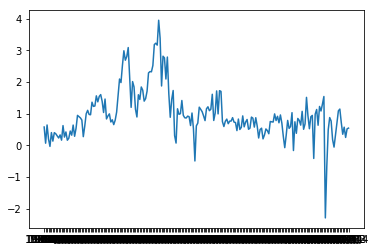

In [0]:
plt.plot(quarterly['DATE'].iloc[1:],quarterly['infla'].iloc[1:])
plt.show()

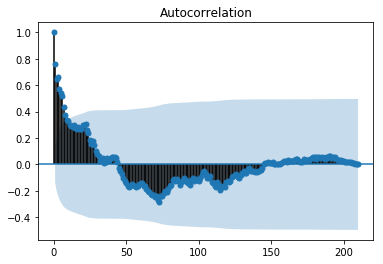

In [0]:
plot_acf(quarterly['infla'].iloc[1:])
plt.show()

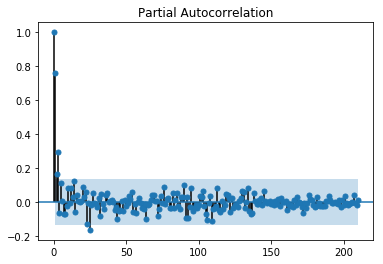

In [0]:
plot_pacf(quarterly['infla'].iloc[1:],method='ywm')
plt.show()

### AIC

In [0]:
intersect = pd.Series(np.ones(infla.iloc[4:].reset_index(drop=True).shape[0]))
x = infla.iloc[4:].reset_index(drop=True)
x_lag1 = infla.iloc[3:-1].reset_index(drop=True)
x_lag2 = infla.iloc[2:-2].reset_index(drop=True)
x_lag3 = infla.iloc[1:-3].reset_index(drop=True)
x_lag4 = infla.iloc[0:-4].reset_index(drop=True)

y1 = x
X1 = pd.concat([intersect,x_lag1],axis=1,ignore_index=True)
k1 = 1
theta1 = np.linalg.inv(X1.T@X1)@X1.T@y1
u1 = y1 - X1@theta1
sig21 = u1.T@u1 / (x.shape[0]- k1 -1)
AIC1 = np.log(sig21) + 2*k1 / x.shape[0]

y2 = x
X2 = pd.concat([intersect,x_lag1,x_lag2],axis=1,ignore_index=True)
k2 = 2
theta2 = np.linalg.inv(X2.T@X2)@X2.T@y2
u2 = y2 - X2@theta2
sig22 = u2.T@u2 / (x.shape[0]-k2-1)
AIC2 = np.log(sig22) + 2*k2 / x.shape[0]

y3 = x
X3 = pd.concat([intersect,x_lag1,x_lag2,x_lag3],axis=1,ignore_index=True)
k3 = 3
theta3 = np.linalg.inv(X3.T@X3)@X3.T@y3
u3 = y3 - X3@theta3
sig23 = u3.T@u3 / (x.shape[0]-k3-1)
AIC3 = np.log(sig23) + 2*k3 / x.shape[0]

y4 = x
X4 = pd.concat([intersect,x_lag1,x_lag2,x_lag3,x_lag4],axis=1,ignore_index=True)
k4 = 4
theta4 = np.linalg.inv(X4.T@X4)@X4.T@y4
u4 = y4 - X4@theta4
sig24 = u4.T@u4 / (x.shape[0]-k4-1)
AIC4 = np.log(sig24) + 2*k4 / x.shape[0]

print(AIC1)
print(AIC2)
print(AIC3)
print(AIC4)


-1.3638872941070408
-1.378702687381504
-1.457680277685082
-1.44725221811162


On teste alors une modélisation AR(3)

In [0]:
intersect = pd.Series(np.ones(infla.iloc[4:].reset_index(drop=True).shape[0]))
x = infla.iloc[4:].reset_index(drop=True)
x_lag1 = infla.iloc[3:-1].reset_index(drop=True)
x_lag2 = infla.iloc[2:-2].reset_index(drop=True)
x_lag3 = infla.iloc[1:-3].reset_index(drop=True)
df = pd.concat([intersect,x_lag1,x_lag2,x_lag3],axis=1,ignore_index=True)

In [0]:
theta = (np.linalg.inv(df.T@df)@df.T)@x

In [0]:
x_hat = df@theta

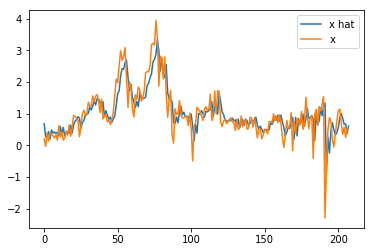

In [0]:
plt.plot(x_hat,label='x hat')
plt.plot(x,label='x')
plt.legend()
plt.show()

## Courbe de Philips

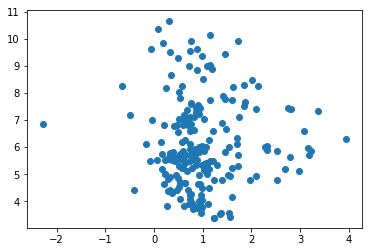

In [0]:
plt.scatter(quarterly['infla'].iloc[1:],quarterly['Unemp'].iloc[1:])
plt.show()

In [0]:
x1 = np.ones(quarterly['infla'].iloc[1:].shape[0])
x2 = quarterly['infla'].iloc[1:].reset_index().drop('index',axis=1)
X = pd.DataFrame(x1)
X = X.assign(infla=x2)
y = quarterly['Unemp'].iloc[1:].reset_index().drop('index',axis=1)

In [0]:
theta = ((np.linalg.inv(X.T@X)@X.T)@y).reset_index(drop=True)
theta

,Unemp
0,6.070819
1,0.015908


In [0]:
u = y-np.dot(X,theta)

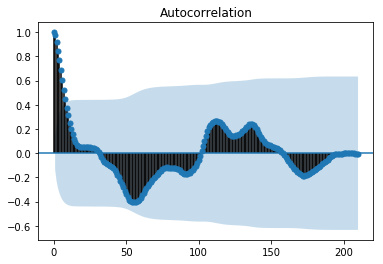

In [0]:
plot_acf(u)
plt.show()

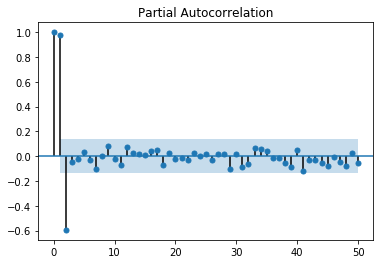

In [0]:
plot_pacf(u,method='ywm',lags=50)
plt.show()

In [0]:
sig2 = u.T@u/(u.shape[0]-3)
std = np.sqrt(np.diag(sig2.iloc[0,0]*np.linalg.inv(X.T@X)))
t=theta['Unemp']/std
t

0    33.495558
1     0.109901
Name: Unemp, dtype: float64

In [0]:
from scipy import stats
u_ = u[1:].reset_index(drop=True)
u_lag = u[:-1].reset_index(drop=True)
y = u_
X = u_lag
rho = (np.linalg.inv(X.T@X)@X.T@y)
e=y-np.matmul(X,rho)
sig2 = e.T@e/(e.shape[0]-2)
std = np.sqrt(np.diag(sig2.iloc[0,0]*np.linalg.inv(X.T@X)))
t = rho/std
cv = stats.t.pdf(0.975,e.shape[0]-2)
pval = stats.t.cdf(abs(t),e.shape[0]-2)*2
print(f't stat : {t}')
print(f'critical value : {cv}')
print(f'p value : {pval}')

t stat :        Unemp
0  67.344869
critical value : 0.2474244399811969
p value : [[2.]]


We reject H0, the errors are autocorrelated

In [0]:
x1 = np.ones(quarterly['infla'].iloc[1:].shape[0])
x2 = quarterly['infla'].iloc[1:].reset_index().drop('index',axis=1)
X = pd.DataFrame(x1)
X = X.assign(infla=x2)
y = quarterly['Unemp'].iloc[1:].reset_index().drop('index',axis=1)

y_ = y[1:].reset_index(drop=True)
y_lag = y[:-1].reset_index(drop=True)
new_y = np.sqrt(1-rho**2)*y.iloc[0,:]
new_y = (new_y.append(y_-np.matmul(y_lag,rho))).reset_index(drop=True)

X_ = X[1:].reset_index(drop=True)
X_lag = X[:-1].reset_index(drop=True)
new_X = pd.DataFrame(np.sqrt(1-rho.iloc[0,0]**2)*X.iloc[0,:]).T
new_X = (new_X.append(X_-X_lag*rho.iloc[0,0])).reset_index(drop=True)

In [0]:
P = np.eye(y.shape[0])
P = P + np.diag(np.ones(y.shape[0]-1)*rho.iloc[0,0],-1)
P[0,0] = np.sqrt(1-rho.iloc[0,0]**2)

new_y_bis = (P@y).reset_index(drop=True)
new_X_bis = (P@X).reset_index(drop=True)

In [0]:
theta_bis = np.linalg.inv(new_X.T@new_X)@new_X.T@new_y
u = new_y - np.dot(new_X,theta_bis)

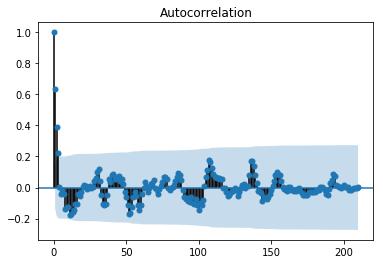

In [0]:
plot_acf(u)
plt.show()

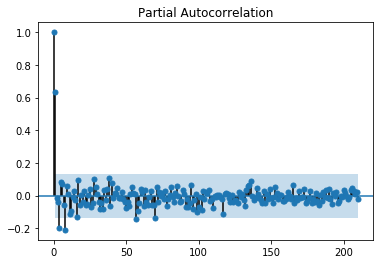

In [0]:
plot_pacf(u,method='ywm')
plt.show()

In [0]:
from scipy import stats
u_ = u[1:].reset_index(drop=True)
u_lag = u[:-1].reset_index(drop=True)
y = u_
X = u_lag
rho = (np.linalg.inv(X.T@X)@X.T@y)
e=y-np.matmul(X,rho)
sig2 = e.T@e/(e.shape[0]-2)
std = np.sqrt(np.diag(sig2.iloc[0,0]*np.linalg.inv(X.T@X)))
t = rho/std
cv = stats.t.pdf(0.975,e.shape[0]-2)
pval = stats.t.cdf(abs(t),e.shape[0]-2)*2
print(f't stat : {t}')
print(f'critical value : {cv}')
print(f'p value : {pval}')

t stat :        Unemp
0  11.828392
critical value : 0.2474244399811969
p value : [[2.]]


## Stabilité de la relation chômage inflation


### Test stationnarité

In [0]:
y1 = quarterly['Unemp'].iloc[:int(infla.shape[0]/2)]
y2 = quarterly['Unemp'].iloc[int(infla.shape[0]/2):]
m1 = np.mean(y1)
m2 = np.mean(y2)
v1 = np.var(y1)
v2 = np.var(y2)

print(f'mean 1 : {m1}')
print(f'mean 2 : {m2}')
print(f'var 1 : {v1}')
print(f'var 2 : {v2}')

mean 1 : 6.125094339622638
mean 2 : 6.0388679245283
var 1 : 2.8641117835528678
var 2 : 2.3201194731221073


In [0]:
y1 = infla.iloc[:int(infla.shape[0]/2)]
y2 = infla.iloc[int(infla.shape[0]/2):]
m1 = np.mean(y1)
m2 = np.mean(y2)
v1 = np.var(y1)
v2 = np.var(y2)

print(f'mean 1 : {m1}')
print(f'mean 2 : {m2}')
print(f'var 1 : {v1}')
print(f'var 2 : {v2}')

mean 1 : 1.2575450160687385
mean 2 : 0.7131728660549772
var 1 : 0.7981088444367619
var 2 : 0.24211620507289106


### Test Dickey Fuller

In [0]:
intersect = pd.Series(np.ones(quarterly['Unemp'].iloc[1:].reset_index(drop=True).shape[0]))
y = quarterly['Unemp'].iloc[1:].reset_index(drop=True)
y_lag = quarterly['Unemp'].iloc[:-1]
delta_y = y.reset_index(drop=True)-y_lag.reset_index(drop=True)
X = pd.concat([intersect,y_lag],axis=1,ignore_index=True).reset_index(drop=True)
theta = np.linalg.inv(X.T@X)@X.T@delta_y
u = delta_y - X@theta
sig2 = u.T@u / (X.shape[0]-2)
std = np.sqrt(np.diag(sig2*np.linalg.inv(X.T@X)))
t=theta/std
t

0    1.480348
1   -1.385513
dtype: float64

### Test Augmented Dickey Fuller

In [0]:
intersect = pd.Series(np.ones(quarterly['Unemp'].iloc[1:].reset_index(drop=True).shape[0]))
y = quarterly['Unemp'].iloc[1:].reset_index(drop=True)
y_lag = quarterly['Unemp'].iloc[:-1]
delta_y = y.reset_index(drop=True)-y_lag.reset_index(drop=True)
delta_y_ = delta_y_.iloc[:-4]
delta_y_lag1 = delta_y_.iloc[1:-3]
delta_y_lag2 = delta_y_.iloc[2:-2]
delta_y_lag3 = delta_y_.iloc[3:-1]
delta_y_lag4 = delta_y_.iloc[4:]


X = pd.concat([intersect,y_lag],axis=1,ignore_index=True).reset_index(drop=True)
theta = np.linalg.inv(X.T@X)@X.T@delta_y
u = delta_y - X@theta
sig2 = u.T@u / (X.shape[0]-2)
std = np.sqrt(np.diag(sig2*np.linalg.inv(X.T@X)))
t=theta/std
t